In [189]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow  import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [163]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, names=col_names)

In [164]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [165]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [166]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [167]:
iris.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [168]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [169]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [170]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [171]:
X = iris.drop(columns=['species'])
y = iris['Species']
X.head(3)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [181]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32


In [182]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3,shuffle=True, random_state=69)


In [183]:
x_train.shape

(105, 5)

In [185]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])

    sepal_length  sepal_width  petal_length  petal_width  Species
57           4.9          2.4           3.3          1.0        1
[[-1.14630942 -1.44374444 -0.25650655 -0.258263    0.01192336]]


In [190]:
y_train = keras.utils.to_categorical(y_train,num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [193]:
model = Sequential()
model.add(Dense(units=32 , activation='relu', input_shape=(x_train.shape[-1],)))
model.add(Dense(units=32 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3 , activation='softmax'))

In [194]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 32)                192       
                                                                 
 dense_71 (Dense)            (None, 32)                1056      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_72 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1347 (5.26 KB)
Trainable params: 1347 (5.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [195]:
model.fit(x_train , y_train , epochs=100, verbose= 2)

Epoch 1/100
4/4 - 2s - loss: 1.1689 - accuracy: 0.1810 - 2s/epoch - 436ms/step
Epoch 2/100
4/4 - 0s - loss: 1.1143 - accuracy: 0.3143 - 39ms/epoch - 10ms/step
Epoch 3/100
4/4 - 0s - loss: 1.0464 - accuracy: 0.5143 - 25ms/epoch - 6ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9765 - accuracy: 0.5810 - 26ms/epoch - 6ms/step
Epoch 5/100
4/4 - 0s - loss: 0.9879 - accuracy: 0.5524 - 25ms/epoch - 6ms/step
Epoch 6/100
4/4 - 0s - loss: 0.9543 - accuracy: 0.5524 - 32ms/epoch - 8ms/step
Epoch 7/100
4/4 - 0s - loss: 0.9065 - accuracy: 0.6381 - 26ms/epoch - 7ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8959 - accuracy: 0.6381 - 33ms/epoch - 8ms/step
Epoch 9/100
4/4 - 0s - loss: 0.8540 - accuracy: 0.6000 - 15ms/epoch - 4ms/step
Epoch 10/100
4/4 - 0s - loss: 0.8070 - accuracy: 0.7238 - 17ms/epoch - 4ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7783 - accuracy: 0.7238 - 28ms/epoch - 7ms/step
Epoch 12/100
4/4 - 0s - loss: 0.7297 - accuracy: 0.7714 - 24ms/epoch - 6ms/step
Epoch 13/100
4/4 - 0s - loss: 0.7627 - accuracy:

In [196]:
prediction = model.predict(x_test)
print(prediction[:5])

2/2 [==============================] - 0s 16ms/step
[[9.9997330e-01 3.3871233e-06 2.3357026e-05]
 [3.2718880e-03 9.8883075e-01 7.8973603e-03]
 [9.9987423e-01 2.7109796e-05 9.8750257e-05]
 [9.3738861e-05 2.7997876e-04 9.9962616e-01]
 [9.9983335e-01 3.7062233e-05 1.2950753e-04]]


In [197]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [198]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: Species, dtype: int32


In [201]:
from sklearn.metrics import accuracy_score , confusion_matrix
print(accuracy_score(y_test,prediction))

1.0


In [202]:
cm = confusion_matrix(y_test,prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  0 17]]


Text(50.72222222222221, 0.5, 'actual')

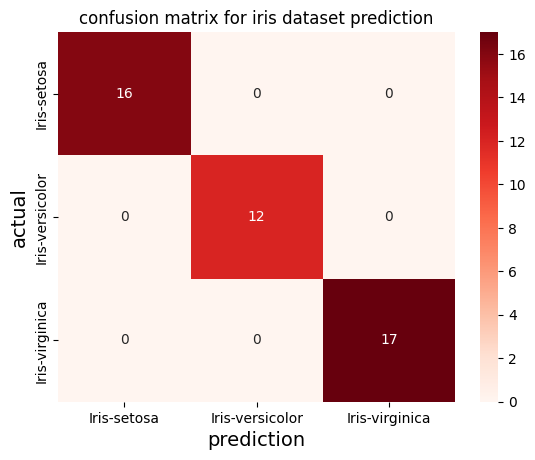

In [214]:
ax = sns.heatmap(cm , annot=True , fmt='d' , cmap='Reds', xticklabels=species_name , yticklabels=species_name)
ax.set_title('confusion matrix for iris dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)

In [217]:
X_test = np.arange(20).reshape((5,4))  
if X_test.size == 0:
    print("X_test is empty!")
# Get first column 
X_test[:,0] = X_test[:,0].astype(np.float32)

# Or first row
X_test[0,:] = X_test[0,:].astype(np.float32)
if X_test.shape[1] > 0:
    X_test[:,0] = 1
X_test = X_test.astype(np.float32)


In [219]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_test shape: (5, 4)
y_test shape: (45,)


In [220]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
X_test_corrected = X_test[:, :4]  # Assuming you want the first 4 features
y_test_corrected = y_test[:5]  # Assuming you want the first 5 samples

# Define a simple model with the correct input shape
model = Sequential()
model.add(Dense(units=32, input_shape=(4,)))  # Update '4' and '32' based on your data and model architecture
# Add other layers as needed
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
# Now, you can evaluate your model with the corrected data
test_results = model.evaluate(X_test_corrected, y_test_corrected, return_dict=True)


1/1 [==============================] - 0s 451ms/step - loss: 7.2878 - accuracy: 0.0000e+00
